In [81]:
import numpy as np
from scipy.stats import multivariate_normal

In [16]:
def e_step(X, means, covariance, density):
  likelihood = np.zeros((10, 2))
  resp = np.zeros((10, 2))

  for i in range(2):
    likelihood[:, i] = multivariate_normal.pdf(X, means[i], covariance[i], allow_singular=True)
    resp[:, i] = density[i] * likelihood[:, i]
  
  log_likelihood = np.sum(np.log(np.sum(resp, axis=1)))
  resp = resp / resp.sum(axis=1, keepdims=1)

  return resp, log_likelihood

In [28]:
def m_step(X, means, covariance, resp):
  for i in range(2):
    weight = resp[:, [i]]
    total_weight = weight.sum()
    means[i] = (X * weight).sum(axis=0) / total_weight
    covariance[i] = np.cov(X.T, aweights=((weight/total_weight).flatten()), bias=True)
  density = resp.mean(axis=0)
  return means, covariance, density

In [30]:
X = [
     [3, 8],
     [3, 6],
     [3, 4],
     [4, 7],
     [4, 5],
     [5, 5],
     [5, 1],
     [7, 4],
     [7, 3],
     [8, 5]
]
X = np.array(X)

In [82]:
means = np.array([[4, 6], [6.5, 3]])
covariance = np.array([[[0.675, 0.9], [0.9, 1.3]],
                       [[0.675, 0.825], [0.825, 1.3]]])
density = np.array([5/10, 5/10])
iterations = 3

for i in range(iterations):
  resp, log_likelihood = e_step(X, means, covariance, density)
  print(f'ITERATION [{i+1}]')
  print('\nLog Likelihood:')
  print(log_likelihood)
  print('\nResponsibility:')
  print(resp)

  means, covariance, density = m_step(X, means, covariance, resp)
  print('\nUpdated Means:')
  print(means)
  print('\nUpdated Covariances:')
  print(covariance)
  print('-------------------------------------------------')

ITERATION [1]

Log Likelihood:
-124.50464701054486

Responsibility:
[[1.00000000e+000 1.55255048e-044]
 [1.00000000e+000 3.76142085e-040]
 [1.00000000e+000 2.37355223e-024]
 [1.00000000e+000 7.35043033e-038]
 [1.00000000e+000 7.94098013e-020]
 [3.61098528e-001 6.38901472e-001]
 [3.58986004e-087 1.00000000e+000]
 [2.27593513e-081 1.00000000e+000]
 [1.96545938e-109 1.00000000e+000]
 [5.36516735e-092 1.00000000e+000]]

Updated Means:
[[3.50776852 5.93264468]
 [6.50897794 3.49102206]]

Updated Covariances:
[[[ 0.3846503  -0.10050973]
  [-0.10050973  1.92810794]]

 [[ 1.38764629  0.98360477]
  [ 0.98360477  2.2499194 ]]]
-------------------------------------------------
ITERATION [2]

Log Likelihood:
-35.37786637271427

Responsibility:
[[9.99999997e-01 3.18706700e-09]
 [9.99997303e-01 2.69664999e-06]
 [9.98580100e-01 1.41989962e-03]
 [9.99987181e-01 1.28188320e-05]
 [9.97396219e-01 2.60378108e-03]
 [6.62493660e-01 3.37506340e-01]
 [2.09940597e-03 9.97900594e-01]
 [2.16316237e-07 9.99999784e

In [83]:
labels = []

for i in range(len(resp)):
  if(resp[i][0] >= resp[i][1]):
    labels.append(0)
  else:
    labels.append(1)

labels

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

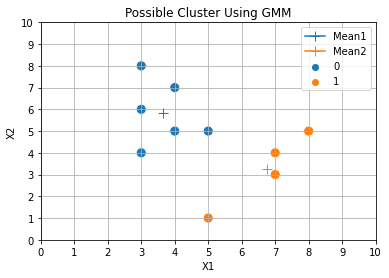

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'Class': labels
})

plt.grid()
sns.scatterplot(x='X1', y='X2', hue='Class', data=df, s=100)
plt.plot(means[0][0], means[0][1], marker='+', markersize=10, label='Mean1')
plt.plot(means[1][0], means[1][1], marker='+', markersize=10, label='Mean2')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.xticks(np.arange(0, 11))
plt.yticks(np.arange(0, 11))
plt.title("Possible Cluster Using GMM")
plt.show()